<a href="https://colab.research.google.com/github/Roterdamjr/Mestrado/blob/main/Markowitz_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ssite pra validar dados mensais
https://www.portfoliovisualizer.com/optimize-portfolio#analysisResults

# Biblioteca

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
def fn_carteira(df, w, retorno_risk_free=0):
    # Retorno esperado anual dos ativos
    r = df.mean() * 252

    # Retorno esperado da carteira
    Rp = np.dot(r, w)

    # Matriz de covariância anual
    matriz_cov = np.cov(df.T) * 252

    # Risco da carteira (desvio padrão anual)
    mat_w = np.array(w)
    Sa = np.sqrt(np.dot(mat_w.T, np.dot(matriz_cov, mat_w)))

    # Índice de Sharpe
    sharpe = (Rp - retorno_risk_free) / Sa

    return Rp, Sa, sharpe


def fn_gera_carteiras(df, numero_carteiras , risk_free=0 ):
  pesos = []
  retornos = []
  riscos = []
  sharpes = []

  for w in fn_matriz_pesos(numero_carteiras):
    Rp, Sa ,sharpe = fn_carteira(df,w,risk_free)
    pesos.append(w)
    retornos.append(Rp)
    riscos.append(Sa)
    sharpes.append(sharpe)

  carteiras = {'pesos': pesos,
                'retornos': retornos,
                'riscos':riscos,
               'sharpes':sharpes}

  return carteiras

def plota(carteiras, retornos, riscos, labels=None):
    sharpe = carteiras['sharpes']
    indice = np.array(sharpe).argmax()
    y_axis = retornos[indice]
    X_axis = riscos[indice]
    plt.figure(figsize=(6,5))
    plt.scatter(riscos, retornos, c=sharpe, cmap = 'viridis')

    plt.scatter(X_axis, y_axis, c = 'red', s = 50)

    plt.title("Fronteira Eficiente")
    plt.xlabel("Risco (Desvio Padrão)")
    plt.ylabel("Retorno Esperado")
    plt.grid(True)

    # Adiciona os rótulos
    if labels != None:
      for i in range(len(labels)):
          plt.text(riscos[i] , retornos[i] , str(labels[i]), fontsize=9)

    #melhor sharpe
    ind_melhor_sharpe  = np.array(sharpe).argmax()
    print('Melhor sharpe: ',
          round(sharpe[ind_melhor_sharpe],2) , 'Risco: ',
          round(riscos[ind_melhor_sharpe],2), 'Retorno: ' ,
          round(retornos[ind_melhor_sharpe],2))

    plt.show()


def fn_matriz_pesos(numero_carteiras):
  # gera uma matriz de numero_carteira linhas e numero de qtde de taivos colunas
  matriz_pesos =[]
  for _ in range(1,numero_carteiras):
    k = np.random.rand(len(df.columns))
    pesos = np.round( k / sum (k) ,2)
    matriz_pesos.append(pesos)

  return matriz_pesos

def fn_plota_tabela(col_A,  col_B):
  df_aux = pd.DataFrame({'Ticker': col_A, 'Peso': col_B})
  df_aux['Peso'] = (df_aux['Peso'] * 100).astype(int)
  print(df_aux)

# Exemplo Trivial

In [ ]:
dados = [
  [-0.05, 0],
  [-0.25, -0.05],
  [	0.3,	0.15],
  [	0.2,	0.15],
  [	0.15,	0.05],
  [	0.3,	0.15],
  [	0.4,	0.45],
  [	0.15,	-0.1]
]

df = pd.DataFrame(dados ,columns=['Fundo Cambial', 'Fundo de Acoes'])

In [ ]:
pesos = []
retornos = []
riscos = []

for w in fn_matriz_pesos():
  Rp, Sa = fn_carteira(df,w)
  pesos.append(w)
  retornos.append(Rp)
  riscos.append(Sa)

carteiras = {'pesos': pesos,
              'returns': retornos,
              'riscos':riscos}

plota(retornos, riscos, pesos)

TypeError: fn_matriz_pesos() missing 1 required positional argument: 'numero_carteiras'

# Carteira com 2 ativos

In [24]:
df_precos = pd.DataFrame()
tickers = ['ITUB4.SA', 'PETR4.SA']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31", auto_adjust=False)['Adj Close']
df = df_precos.pct_change()
df = df.dropna()

[*********************100%***********************]  2 of 2 completed


Melhor sharpe:  2.03 Risco:  0.56 Retorno:  1.13


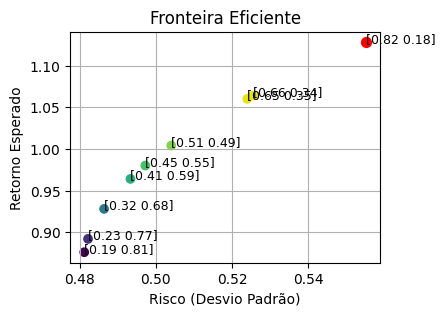

In [ ]:
carteiras = fn_gera_carteiras(df ,10)
retornos, riscos, pesos, sharpe = carteiras['retornos'], carteiras['riscos'], carteiras['pesos'], carteiras['sharpes']
plota(retornos, riscos, pesos)

# Carteira com 3 ativos

In [ ]:
df_precos = pd.DataFrame()
tickers = ['ITUB4.SA', 'PETR4.SA', 'LREN3.SA']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31", auto_adjust=False)['Adj Close']
df = df_precos.pct_change()
df = df.dropna()

/tmp/ipython-input-16-3823803092.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
[*********************100%***********************]  3 of 3 completed


Melhor sharpe:  1.12 Risco:  0.71 Retorno:  0.8


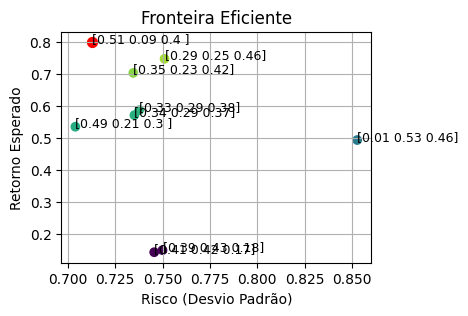

In [ ]:
carteiras = fn_gera_carteiras(df ,10)
retornos, riscos, pesos, sharpe = carteiras['retornos'], carteiras['riscos'], carteiras['pesos'], carteiras['sharpes']
plota(retornos, riscos, pesos)

# Mensal

https://www.portfoliovisualizer.com/optimize-portfolio#analysisResults

In [ ]:
df_precos = pd.DataFrame()
tickers = ['AMZN', 'GOOG', 'MSFT', 'NFLX']
df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31", auto_adjust=False)['Adj Close']
df = df_precos.pct_change()
df = df.dropna()

#retorno mensal
df = df.resample('M').last()

/tmp/ipython-input-34-1373879183.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers,  "2023-01-01", "2024-12-31")['Close']
[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-34-1373879183.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').last()


  Ticker  Peso
0   AMZN     5
1   GOOG     3
2   MSFT     0
3   NFLX    92
Melhor carteira : None
Melhor sharpe:  1.27 Risco:  0.06 Retorno:  0.07


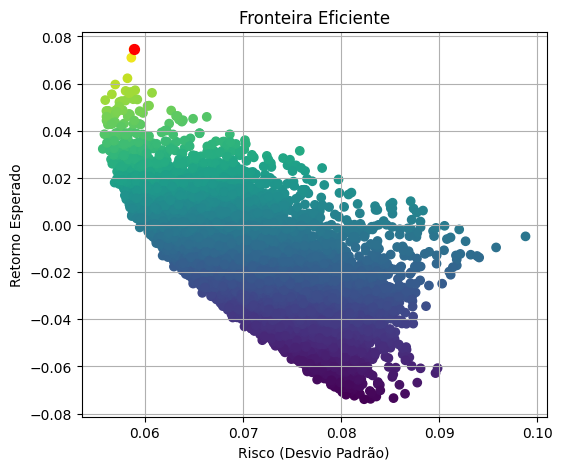

In [ ]:
carteiras = fn_gera_carteiras(df ,10000)
retornos, riscos, pesos, sharpe = carteiras['retornos'], carteiras['riscos'], carteiras['pesos'], carteiras['sharpes']

indice = np.array(sharpe).argmax()
print('Melhor carteira :',fn_plota_tabela(tickers, carteiras['pesos'][indice]))

plota(carteiras,retornos, riscos)

# Carteira com varios pesos

In [25]:
df_precos = pd.DataFrame()
tickers = ['AMZN', 'GOOG', 'MSFT', 'NFLX']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31", auto_adjust=False)['Adj Close']
df = df_precos.pct_change()
df = df.dropna()

[*********************100%***********************]  4 of 4 completed


  Ticker  Peso
0   AMZN     2
1   GOOG    33
2   MSFT    42
3   NFLX    24
Melhor carteira : None
Melhor sharpe:  0.91 Risco:  0.3 Retorno:  0.27


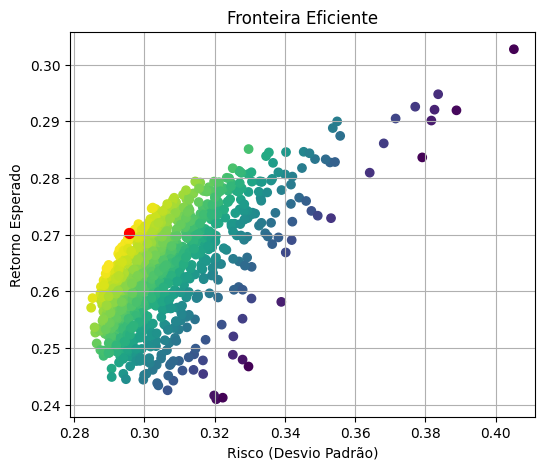

In [26]:
carteiras = fn_gera_carteiras(df ,1000)
retornos, riscos, pesos, sharpe = carteiras['retornos'], carteiras['riscos'], carteiras['pesos'], carteiras['sharpes']

indice = np.array(sharpe).argmax()
print('Melhor carteira :',fn_plota_tabela(tickers, carteiras['pesos'][indice]))

plota(carteiras, retornos, riscos)

# Ativo livre de risco + 1 ação

In [27]:
df_precos = pd.DataFrame()
tickers = ['AMZN', 'GOOG', 'MSFT', 'NFLX']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31", auto_adjust=False)['Adj Close']
df = df_precos.pct_change()
df = df.dropna()

[*********************100%***********************]  4 of 4 completed


Melhor sharpe:  1.12 Risco:  0.11 Retorno:  0.13


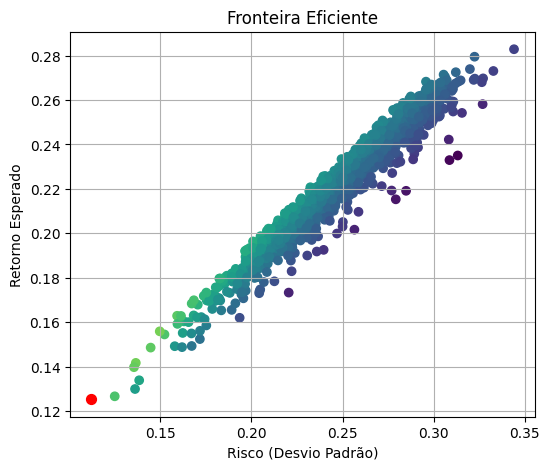

In [37]:
rend_risk_free_anual = .04
a =  rend_risk_free_anual/252
df['rf']  = a # em rendimento diario considerando 252 dias ao ano

carteiras = fn_gera_carteiras(df ,1000)
retornos, riscos, pesos = carteiras['retornos'], carteiras['riscos'], carteiras['pesos']
plota(carteiras,retornos, riscos)

# Ativo livre de risco + 2 ações

[*********************100%***********************]  4 of 4 completed


Melhor sharpe:  1.22 Risco:  0.08 Retorno:  0.1


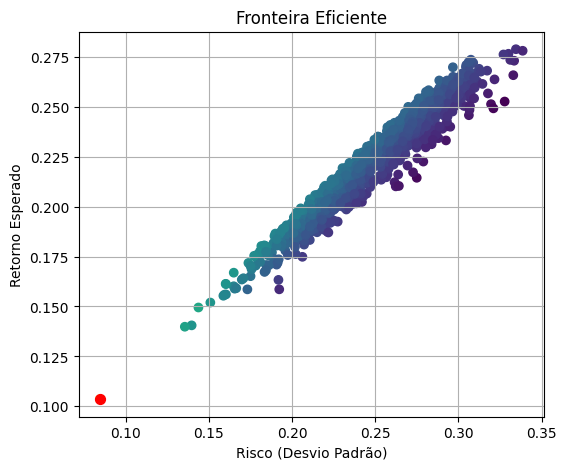

In [36]:
df_precos = pd.DataFrame()
tickers = ['AMZN', 'GOOG', 'MSFT', 'NFLX']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31", auto_adjust=False)['Adj Close']
df = df_precos.pct_change()
df = df.dropna()

rend_risk_free_anual = 0.04
a=  rend_risk_free_anual/252
df['rf']  =a # em rendimento diario considerando 252 dias ao ano

carteiras = fn_gera_carteiras(df , 1000)
retornos, riscos, pesos = carteiras['retornos'], carteiras['riscos'], carteiras['pesos']
plota(carteiras,retornos, riscos)


# Ativo livre de risco + Carteira de Ações

Sem e Com risk free

[*********************100%***********************]  4 of 4 completed


Melhor sharpe:  0.92 Risco:  0.29 Retorno:  0.27


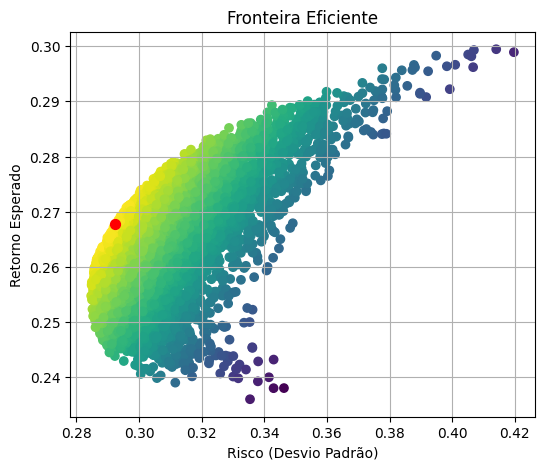

Melhor sharpe:  0.78 Risco:  0.21 Retorno:  0.2


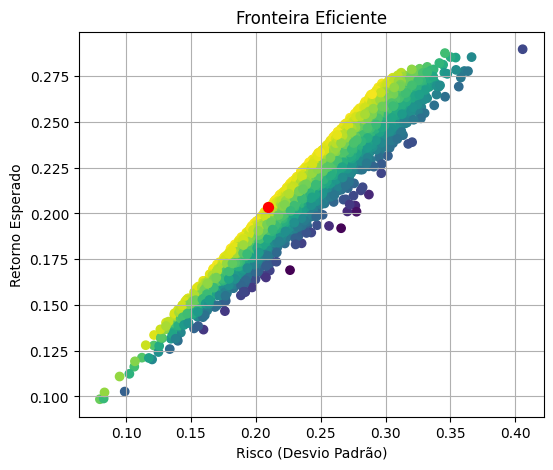

In [38]:
df_precos = pd.DataFrame()
tickers = ['AMZN', 'GOOG', 'MSFT', 'NFLX']
df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31", auto_adjust=False)['Adj Close']
df = df_precos.pct_change()
df = df.dropna()

#### sem risk free ####
carteiras = fn_gera_carteiras(df, 10000)
retornos, riscos, pesos = carteiras['retornos'], carteiras['riscos'], carteiras['pesos']
plota(carteiras,retornos, riscos)

##### risk free ####
rend_risk_free_anual = .04  # 4% a.a.
a=  rend_risk_free_anual/252
df['rf']  =a # em rendimento diario considerando 252 dias ao ano

carteiras = fn_gera_carteiras(df, 10000, rend_risk_free_anual)
retornos, riscos, pesos = carteiras['retornos'], carteiras['riscos'], carteiras['pesos']
plota(carteiras,retornos, riscos)
